Install the packages I will need for the project

In [2]:
! pip install -q kaggle

In [1]:
! pip install -q Pillow

In [3]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the packages that will be used and download the data from Kaggle.

In [6]:
import numpy as np
import math
import os
import warnings
import opendatasets as od
import pandas as pd
warnings.filterwarnings('ignore')



In [7]:
od.download(
    "https://www.kaggle.com/competitions/histopathologic-cancer-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuatrahan
Your Kaggle Key: ··········


100%|██████████| 6.31G/6.31G [05:14<00:00, 21.5MB/s]



Extracting archive ./histopathologic-cancer-detection/histopathologic-cancer-detection.zip to ./histopathologic-cancer-detection


In [8]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from keras import Sequential
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers.preprocessing.image_preprocessing import Rescaling
from keras.layers.serialization import activation
from keras.backend import dropout
from keras.engine import input_layer
from keras import layers
import keras
import tensorflow as tf

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from PIL import Image

## File Creation and Organization

I created a new folder for the jpg version of the images. The training data will be separated into two subfolders, one for the positive images and the other for the negative images.

In [9]:
os.chdir('/content/histopathologic-cancer-detection')
dir = os.getcwd()
dir_train = '/content/histopathologic-cancer-detection/train'
dir_test = '/content/histopathologic-cancer-detection/test'
j_train = '/content/histopathologic-cancer-detection/j_train'
j_test = '/content/histopathologic-cancer-detection/j_test'

j_train_1 = '/content/histopathologic-cancer-detection/j_train/j_train_1'

j_train_2 = '/content/histopathologic-cancer-detection/j_train/j_train_0'


In [10]:
p_train = os.path.join(dir,j_train)
p_test = os.path.join(dir, j_test)

p_train1 = os.path.join(j_train, j_train_1)
p_train2 = os.path.join(j_train, j_train_2)


os.mkdir(p_train)
os.mkdir(p_test)

os.mkdir(p_train1)
os.mkdir(p_train2)

## Establish Directory Lists

I created a list for the files in the directories to help with image preprocessing.

In [11]:
trainLabels = pd.read_csv('./train_labels.csv')
trainLabels = trainLabels.sort_values(by=['id'])
train_labels = list(trainLabels.label)


In [12]:
X_train = os.listdir('./train')
X_train = sorted(X_train)

## Training Set

The training set has 220,025 images. Approximately 60% of the training data is labeled 1 and the other 40% 0.

In [13]:
trainLabels.id.nunique(), len(trainLabels)

(220025, 220025)

In [14]:
trainLabels.label.value_counts()

0    130908
1     89117
Name: label, dtype: int64

## Image Size (96,96,3)

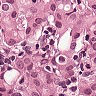

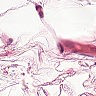

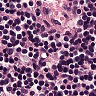

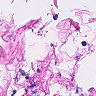

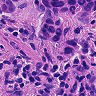

In [89]:
for i in range(0,5):
  img = load_img('./train/'+X_train[i])
  img.show()

In [93]:
label_lst = list(trainLabels.label)
label_lst = sorted(label_lst)

img = load_img('./train/'+X_train[i])
img = img_to_array(img)
img.shape

(96, 96, 3)

## Convert Images to JPG

In [17]:
for i in range(len(X_train)):
  if train_labels[i] == 1:
    img = Image.open('./train/'+ X_train[i])
    n_name = X_train[i].replace(".tif", ".jpg")
    new_train = './j_train/j_train_1' + "/" + n_name
    img.save(new_train)
  elif train_labels[i] == 0:
    img = Image.open('./train/'+ X_train[i])
    n_name = X_train[i].replace(".tif", ".jpg")
    new_train = './j_train/j_train_0' + "/" + n_name
    img.save(new_train)
  else:
    print('damn')


In [18]:
for im in os.listdir('./test'):
    img = Image.open('./test/'+ im)
    n_name = im.replace(".tif", ".jpg")
    new_train = './j_test' + "/" + n_name
    img.save(new_train)

## Check the File Names

In [21]:
test_lst = np.array(os.listdir('./j_test'))

df_test = pd.DataFrame(test_lst, columns=['file'])
df_test.head()

,file
0,7e916b6a0e78607eec129378f64b670574f7587d.jpg
1,0f9eaa0597e4573ca819d8c0b0ef528332039be7.jpg
2,a4621037d71d24982534776c73cbdd18f5d36501.jpg
3,1dac90f12f4312a5748217a555a44f363e9830b2.jpg
4,2b1ae7d6a14f4361de730b1dab41e2e023634877.jpg


## Model Building with Sequential

In [28]:
model = Sequential()

model.add(layers.Rescaling(scale = 1./255,input_shape=(96,96,3)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = .10))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = .10))
model.add(Dense(units = 1, activation = 'sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 conv2d_6 (Conv2D)           (None, 92, 92, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                  

In [29]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics = 'accuracy')

## Preprocess the Images

I divided my training dataset into 80% training data and 20% validation data. 

In [25]:
train_generator = keras.utils.image_dataset_from_directory(
    directory = './j_train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(96, 96),
    shuffle=True,
    seed=123,
    validation_split=.20,
    subset='training')

train_generator_val = keras.utils.image_dataset_from_directory(
    directory = './j_train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(96,96),
    shuffle=True,
    seed=123,
    validation_split=.20,
    subset='validation')



Found 220025 files belonging to 2 classes.
Using 176020 files for training.
Found 220025 files belonging to 2 classes.
Using 44005 files for validation.


## Preprocess the Testing Data

I opted to use ImageDataGenerate for my testing data since the data is not divided into class folders. Using the this generator and a dataframe structure, I was able to correctly format the test images.

In [23]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()

test_data = test_generator.flow_from_dataframe(directory='./j_test', dataframe= df_test, class_mode = None, shuffle = False,x_col = 'file', y_col=None,target_size = (96,96))

Found 57458 validated image filenames.


## Fitting My Model

In order to manage the training process I am using early stopping and model checkpoint as callbacks. I am looking for a minimum change in accuracy of .005 for at least 5 epochs (patience = 5).

I reduced my dropout in my model in order to help fit the model better. I also added an additional Conv2D and Maxpooling2D to my initial model to help with accuracy. 

I opted for the adam optimizer.

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience = 5, verbose = 1, mode = 'auto')
mod_checkpt = ModelCheckpoint(monitor = 'val_accuracy', filepath='./best_mod.b1', verbose = 1, save_best_only= True)

cb = [early_stop, mod_checkpt]

outcomes = model.fit_generator(generator = train_generator, steps_per_epoch=8, epochs=100, callbacks=cb, 
                               verbose = 1, validation_data=train_generator_val)



Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6880 - accuracy: 0.5982
Epoch 1: val_accuracy improved from -inf to 0.59759, saving model to ./best_mod.b1


8/8 [==============================] - 21s 3s/step - loss: 0.6840 - accuracy: 0.6016 - val_loss: 0.6647 - val_accuracy: 0.5976
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6588 - accuracy: 0.6116
Epoch 2: val_accuracy did not improve from 0.59759
8/8 [==============================] - 21s 3s/step - loss: 0.6550 - accuracy: 0.6133 - val_loss: 0.6535 - val_accuracy: 0.5976
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.5977
Epoch 3: val_accuracy did not improve from 0.59759
8/8 [==============================] - 15s 2s/step - loss: 0.6609 - accuracy: 0.5977 - val_loss: 0.6582 - val_accuracy: 0.5975
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.6242 - accuracy: 0.6211
Epoch 4: val_accuracy improved from 0.59759 to 0.61266, saving model to ./best_mod.b1


8/8 [==============================] - 18s 3s/step - loss: 0.6242 - accuracy: 0.6211 - val_loss: 0.6168 - val_accuracy: 0.6127
Epoch 5/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6054 - accuracy: 0.6786
Epoch 5: val_accuracy improved from 0.61266 to 0.67033, saving model to ./best_mod.b1


8/8 [==============================] - 18s 3s/step - loss: 0.6342 - accuracy: 0.6523 - val_loss: 0.5830 - val_accuracy: 0.6703
Epoch 6/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6467 - accuracy: 0.6205
Epoch 6: val_accuracy did not improve from 0.67033
8/8 [==============================] - 16s 2s/step - loss: 0.6504 - accuracy: 0.6172 - val_loss: 0.6010 - val_accuracy: 0.6386
Epoch 7/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6192 - accuracy: 0.5982
Epoch 7: val_accuracy improved from 0.67033 to 0.74392, saving model to ./best_mod.b1


8/8 [==============================] - 18s 3s/step - loss: 0.6164 - accuracy: 0.6133 - val_loss: 0.6112 - val_accuracy: 0.7439
Epoch 8/100
8/8 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.7383
Epoch 8: val_accuracy improved from 0.74392 to 0.76425, saving model to ./best_mod.b1


8/8 [==============================] - 17s 2s/step - loss: 0.5913 - accuracy: 0.7383 - val_loss: 0.5196 - val_accuracy: 0.7643
Epoch 9/100
7/8 [=========================>....] - ETA: 0s - loss: 0.5619 - accuracy: 0.7411
Epoch 9: val_accuracy did not improve from 0.76425
8/8 [==============================] - 18s 3s/step - loss: 0.5595 - accuracy: 0.7422 - val_loss: 0.5141 - val_accuracy: 0.7535
Epoch 10/100
7/8 [=========================>....] - ETA: 0s - loss: 0.5286 - accuracy: 0.7411
Epoch 10: val_accuracy did not improve from 0.76425
8/8 [==============================] - 21s 3s/step - loss: 0.5437 - accuracy: 0.7344 - val_loss: 0.7444 - val_accuracy: 0.6445
Epoch 11/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6261 - accuracy: 0.7009
Epoch 11: val_accuracy did not improve from 0.76425
8/8 [==============================] - 18s 3s/step - loss: 0.6185 - accuracy: 0.7266 - val_loss: 0.6151 - val_accuracy: 0.7278
Epoch 12/100
7/8 [=========================>....] - ETA:

## Check Accuracy of Training

My accuracy and validation accuracy are very close for each epoch, so that gives me confidence that I am not overfitting.

In [31]:
outcomes = outcomes.history

outcomes['val_accuracy'],outcomes['accuracy']


([0.5975911617279053,
  0.5975911617279053,
  0.5974775552749634,
  0.6126576662063599,
  0.6703329086303711,
  0.6386092305183411,
  0.7439154386520386,
  0.7642540335655212,
  0.7534825801849365,
  0.6445176601409912,
  0.7277809381484985,
  0.7412112355232239,
  0.7543688416481018],
 [0.6015625,
  0.61328125,
  0.59765625,
  0.62109375,
  0.65234375,
  0.6171875,
  0.61328125,
  0.73828125,
  0.7421875,
  0.734375,
  0.7265625,
  0.7421875,
  0.75390625])

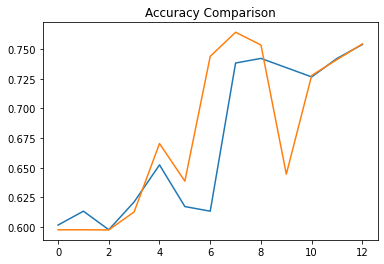

In [35]:
plt.plot(outcomes['accuracy'])
plt.plot(outcomes['val_accuracy'])
plt.title('Accuracy Comparison')

plt.show()

## Load Best Model and Predict

In [32]:
model = keras.models.load_model('./best_mod.b1')

pred = model.predict(test_data)
  

1796/1796 [==============================] - 61s 34ms/step


In [33]:
df = pd.DataFrame(pred.round(), os.listdir('./test'), columns = ['Prediction']).reset_index()

## Discussion

In the end, I scored 50% accuracy on my first submission on Kaggle. That was not nearly as good as my validation scores of 70%-75%. In retrospect, I maybe should have done more preprocessing on the training data (zoom, flip, etc). Maybe if I did not pull some test data out for validation I may have built a better model. 

There is also the change that I overprocessed my validation data. If I did this my model would have worked much better on real-world data.